# 2. Regression

This notebook is about regression, especially linear regression and logistic regression in ML using PyTorch.

**Table of Contents**

* [**Regression**](#Regression)

* **2.1.** [**Linear Regression**](#2.1.-Linear-Regression)
    
* **2.2.** [**Logistic Regression**](#2.2.-Logistic-Regression)

## Regression

회귀는 ML에서 원초적인 알고리즘 중 하나이다. 

독립변수(다른 변수에 종속되지 않고 독립적으로 변하고, 다른 변수의 값을 결정하는 변수; 연구자가 의도적으로 변화시키는 변수)와 

종속변수(독립변수에 의해 결정되는 변수; 연구자가 독립변수의 변화에 따라 어떻게 변하는지 알고 싶어하는 변수) 사이의 관계를 분석하는 방법이다. 

![image](https://user-images.githubusercontent.com/88715406/178408334-9ac6b74e-6cb0-4ef1-8876-4dd93f75d2fe.png)

전체적인 과정의 흐름은

1) 가설 (hypothesis)를 세운 후

2) cost (=loss)를 통해 가설이 얼마나 틀렸는지를 판단하여

3) cost를 줄이는 방향으로 다시 가설 설립한다.

이때 주로 사용하는 방법이 gradient descent이다.

### 2.1. Linear Regression

종속 변수 Y와 1개 이상의 독립변수 X에 대해 선형 (Linear) 상관 관계를 모델링하는 회귀분석이다. 

이 튜토리얼에서는 torch 라이브러리에서 nn (Neural Network의 약자로, Deep Learning의 신경망의 모든 것을 포괄하는 라이브러리다.)을 import하여, nn.Linear class를 사용해 학습을 진행한다. 

* **Data**
|       | **x** |   **y**   |
|-------|:-----:|:---------:|
| **0** |   1   | 1.6193786 |
| **1** |   2   | 1.8572904 |
| **2** |   3   | 2.6281943 |
| **3** |   4   | 2.7254255 |
| **4** |   5   |  3.498926 |
| **5** |   6   | 3.8670416 |
| **6** |   7   |  4.934539 |
| **7** |   8   | 4.8648295 |
| **8** |   9   |  5.241539 |
| **9** |   10  |  5.823689 |

(이 데이터들은 아래와 같은 코드로 랜덤 생성 가능하다.)

~~~
x = torch.arange(1, 11, dtype=torch.float).unsqueeze(dim=1)
y = x / 2 + 1 + torch.randn(10).unsqueeze(dim=1) / 5

data = torch.cat((x, y), dim=1)
data = pd.DataFrame(data.numpy())

data.to_csv('data/02_Logistic_Regression_Model_Data.csv', header=['x', 'y'])
~~~

In [1]:
# Imports 
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the Data
data = pd.read_csv('data/02_Linear_Regression_Model_Data.csv')
print(data['x'])

print(data['x'].values)

x = torch.from_numpy(data['x'].values)
x = x.unsqueeze(dim=1).float()
print(x)

y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
Name: x, dtype: float64
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])


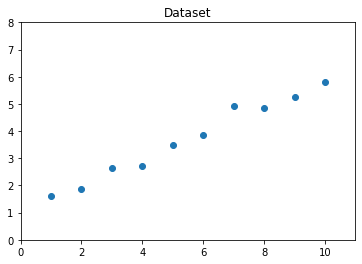

In [3]:
# Plot the data
plt.xlim(0, 11)
plt.ylim(0, 8)
plt.title('Dataset')
plt.scatter(x, y)

plt.show()

* **Linear Regression (Define Model)**

독립 변수 X와 bias로 Y의 선형 모델을 세운다. 


In [4]:
model = nn.Linear(in_features=1, out_features=1, bias=True) # dim 1 -> dim 1인 선형 모델 정의

print("Model:", model)
print("Weight:",model.weight)
print("Bias:",model.bias)

Model: Linear(in_features=1, out_features=1, bias=True)
Weight: Parameter containing:
tensor([[0.4063]], requires_grad=True)
Bias: Parameter containing:
tensor([0.6465], requires_grad=True)


* **Set Loss function(creterion) and Optimizer**

적절한 모델을 선정할 때와 마찬가지로 loss function과 optimizer를 결정하는 것은 학습 속도와 성능을 결정짓는 중요한 부분이다. 

간단한 모델이므로, 임의로 SGD optimizer를 선택하도록 한다. 

$MSE = \frac{1}{N}\sum_{n=1}^{N} (\widehat{y_n} - y_n)^2$

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

print(model(x)) # forward, Wx + b

tensor([[1.0528],
        [1.4591],
        [1.8653],
        [2.2716],
        [2.6779],
        [3.0842],
        [3.4904],
        [3.8967],
        [4.3030],
        [4.7092]], grad_fn=<AddmmBackward0>)


* **Train the Model**

In [6]:
for step in range(500):
    prediction = model(x) # forward pass: compute predicted yy by passing x to the model
    
    loss = criterion(input=prediction, target=y) # compute and print loss
    
    if step % 100 == 0:
        print("{} step: {}".format(step, loss.item())) # item(): 1x1 tensor -> number 
        
    optimizer.zero_grad() # to avoid accumulation of grads
    loss.backward() # compute the gradient
    optimizer.step() # update the parameter

0 step: 0.7700192332267761
100 step: 0.05421854183077812
200 step: 0.04647984355688095
300 step: 0.04314452037215233
400 step: 0.041707031428813934


* **Visualize Results**

prediction은 grad를 포함한 torch.tensor임을 유의한다. 

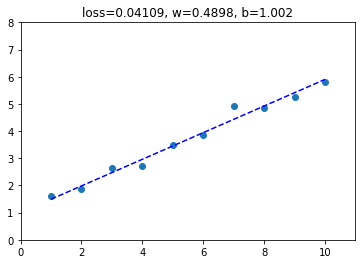

In [7]:
def display_results(model, x, y):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    
    plt.xlim(0, 11);    plt.ylim(0, 8)
    plt.scatter(x, y) 
    plt.plot(x, prediction.data.numpy(), 'b--')
    plt.title('loss={:.4}, w={:.4}, b={:.4}'.format(loss.item(), model.weight.item(), model.bias.item()))
    plt.show()
    
display_results(model, x, y)

### 2.2. Logistic Regression

종속 변수인 Y가 범주형(categorical) 변수일 때 사용하는 회귀분석. 

예를 들어, 합격과 불합격, 승리와 패배, 발병과 정상 등 종속 변수 Y가 중간 범주가 없는 separable할 경우, 선형 회귀를 사용할 수 없게 된다.

![image](https://user-images.githubusercontent.com/88715406/178423993-87b3b7de-874d-4e36-9cbd-e21ff8c225b7.png)

이때, 선형 모델의 output에 logistic 함수 (sigmoid)를 추가하여 모델링을 할 수 있다. 이를 Logistic 회귀라고 한다. 

![image](https://user-images.githubusercontent.com/88715406/178425271-f0ca7b41-53d3-443e-9b75-0e3c9addbc8e.png)

(Logistic 회귀는 일종의 classification으로도 볼 수 있다.)

이 튜토리얼에서는 간단한 dataset을 이용한 Binary (0 or 1) logistic regression을 구현해본다. 

* **Data**
|       | **x** |   **y**   |
|-------|:-----:|:---------:|
| **0** |   1   | 0 |
| **1** |   2   | 0 |
| **2** |   3   | 0 |
| **3** |   4   | 0 |
| **4** |   5   |  0 |
| **5** |   6   | 1 |
| **6** |   7   |  1 |
| **7** |   8   | 1 |
| **8** |   9   |  1 |
| **9** |   10  |  1 |

(이 데이터들은 아래와 같은 코드로 랜덤 생성 가능하다.)

~~~
x = torch.arange(1, 11, dtype=torch.float).unsqueeze(dim=1)
y = torch.gt((x / 2 + 1 + torch.randn(10).unsqueeze(dim=1) / 5), 4).float()

data = torch.cat((x, y), dim=1)
data = pd.DataFrame(data.numpy())

data.to_csv('data/02_Logistic_Regression_Model_Data.csv', header=['x', 'y'])
~~~

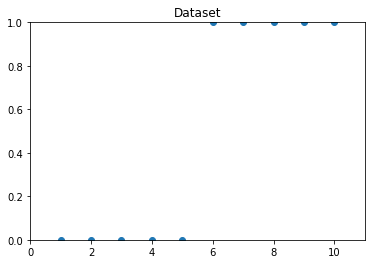

In [8]:
# Load the Data
data = pd.read_csv('data/02_Logistic_Regression_Model_Data.csv')
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

# Plot the data
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.title('Dataset')
plt.scatter(x, y)

plt.show()

* **Logistic Regression (Define Model)**

nn.Module 층을 차례대로 쌓을 수 있도록 해주는 nn.Sequential()을 이용해, 선형 모델과 sigmoid를 결합한 모델을 만들어준다. 

![image](https://user-images.githubusercontent.com/88715406/178416538-8841af04-993c-4b15-baa0-ca67b7d2d706.png)

In [9]:
model =  nn.Sequential(
   nn.Linear(in_features=1, out_features=1, bias=True), # dim 1 -> dim 1인 선형 모델 정의
   nn.Sigmoid() # 출력은 sigmoid 함수를 거친다
)

print("Model:", model)

Model: Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


* **Set Loss function(creterion) and Optimizer**

Linear Regression에서 MSE를 cost function으로 사용하였는데, sigmoid를 사용할 경우 MSE에 문제점이 발생한다. 

$MSE = \frac{1}{N}\sum_{n=1}^{N} (\sigma(z = Wx + b) - y_n)^2$

이를 미분하면, 미분값에 $\sigma(z)'$이 곱해지게 되는데, 함수의 개형을 보면 알 수 있듯이 $z$가 너무 크거나 작을 경우 미분값이 급격하게 0에 수렴한다. (**vanishing gradient problem of sigmoid**)

이런 문제 때문에 Logistic 회귀 뿐만 아니라 신경망 학습 등에서도 MSE function 대신 Cross Entropy function을 더 활발하게 사용한다. 

$BCE = - \frac{1}{N}\sum_{n=1}^{N} y_n \mathrm{log}(\widehat{y}_n) + (1-y_n) \mathrm{log}(1-\widehat{y}_n)$

In [10]:
criterion = nn.BCELoss() # Binary Logistic Regression이므로 binary cross entropy 사용
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

print(model(x)) # forward, sigmoid(Wx + b)

tensor([[0.6653],
        [0.8114],
        [0.9031],
        [0.9528],
        [0.9776],
        [0.9895],
        [0.9951],
        [0.9977],
        [0.9990],
        [0.9995]], grad_fn=<SigmoidBackward0>)


* **Train the Model**

In [11]:
for step in range(1000):
    prediction = model(x) # forward pass: compute predicted yy by passing x to the model
    
    loss = criterion(input=prediction, target=y) # compute and print loss
    
    if step % 100 == 0:
        print("{} step: {}".format(step, loss.item())) # item(): 1x1 tensor -> number 
        
    optimizer.zero_grad() # to avoid accumulation of grads
    loss.backward() # compute the gradient
    optimizer.step() # update the parameter

0 step: 1.1967670917510986
100 step: 0.17689546942710876
200 step: 0.11801137775182724
300 step: 0.09239517897367477
400 step: 0.07693170011043549
500 step: 0.06613761186599731
600 step: 0.057965267449617386
700 step: 0.051454413682222366
800 step: 0.046086687594652176
900 step: 0.04155372083187103


* **Visualize Results**

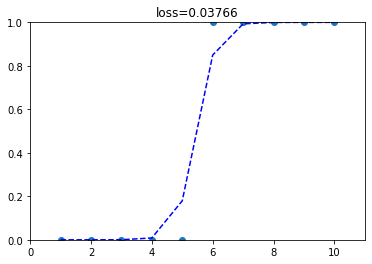

In [13]:
def display_results(model, x, y):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    
    plt.xlim(0, 11);    plt.ylim(0, 1)
    plt.scatter(x, y) 
    plt.plot(x, prediction.data.numpy(), 'b--')
    plt.title('loss={:.4}'.format(loss.item()))
    plt.show()
    
display_results(model, x, y)